In [23]:
# Import the dataset.

from keras.datasets import imdb

(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=10000)

In [24]:
# Build lookup and reverse lookup

lookup = imdb.get_word_index()
reverse_lookup = {}
for word in lookup:
    index = lookup[word]
    reverse_lookup[index] = word
review_lookup = {0: 'Negative review',
                 1: 'Positive review'}


In [25]:
print(len(X_train))
print(len(y_train))
print(len(X_test))
print(len(y_test))

# Grab a sample training and test example.
sample_train, sample_test = X_train[0], y_train[0]

# Translate this review to english.
print(review_lookup[sample_test])
words = []
for index in sample_train:
    words.append(reverse_lookup.get(index - 3, '?'))
print(' '.join(words))

25000
25000
25000
25000
Positive review
? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be prais

In [29]:
# Write a utility method to one-hot encode our word tensor.
import numpy as np

SIZE = len(lookup)
CORPUS = 10000
        
def vectorize_input(X):
    tensor = np.zeros((len(X), CORPUS))
    for index, sequence in enumerate(X):
        tensor[index, sequence] = 1
    return tensor

X_train = vectorize_input(X_train)
X_test = vectorize_input(X_test)

[[0. 1. 1. ... 0. 0. 0.]
 [0. 1. 1. ... 0. 0. 0.]
 [0. 1. 1. ... 0. 0. 0.]
 ...
 [0. 1. 1. ... 0. 0. 0.]
 [0. 1. 1. ... 0. 0. 0.]
 [0. 1. 1. ... 0. 0. 0.]]


IndexError: arrays used as indices must be of integer (or boolean) type

In [31]:
# Make sure we've vectorized our operations properly. Write a quick
# utility function to decode a one hot tensor
def decode_onehot(tensor):
    sequence = []
    for index, value in enumerate(tensor):     
        if value == 1:
            sequence.append(reverse_lookup.get(index - 3, '?'))
    return ' '.join(sequence)

In [18]:
"""
Build our model. Since our input is a 10,000 length vector of all the words, 
our input should be that. We can add several dense layers to capture higher
level features of groups of words, with the final output being a sigmoid 
on 0/1 for positive/negative.

We'll use rectilinear activation for hidden units.

First layer - 10000 Nodes.
Second layer - 5000
Third layer - 2500
Fourth layer - 1000
Fifth layer - 500
Sixth layer - 100
Seventh layer - 1
"""
from keras.layers import Dense
from keras.models import Sequential

# Declare hidden layer sizes.
HIDDEN_LAYER_SIZES = (10000, 5000, 2500, 1000, 500, 100)

# Initialize a model.
model = Sequential()

# Add the layers.
for i in range(len(HIDDEN_LAYER_SIZES) - 1):
    input_size = HIDDEN_LAYER_SIZES[i]
    output_size = HIDDEN_LAYER_SIZES[i+1]
    model.add(Dense(output_size, input_dim=input_size, activation='relu'))
    
# Add the output layer.
model.add(Dense(1, activation='sigmoid'))

# Print the summary.
model.summary()

# Compile the model.
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_14 (Dense)             (None, 5000)              50005000  
_________________________________________________________________
dense_15 (Dense)             (None, 2500)              12502500  
_________________________________________________________________
dense_16 (Dense)             (None, 1000)              2501000   
_________________________________________________________________
dense_17 (Dense)             (None, 500)               500500    
_________________________________________________________________
dense_18 (Dense)             (None, 100)               50100     
_________________________________________________________________
dense_19 (Dense)             (None, 1)                 101       
Total params: 65,559,201
Trainable params: 65,559,201
Non-trainable params: 0
________________________________________________________________

In [36]:
# Train the model
progress = model.fit(x=X_train, y=y_train, validation_split=0.2, epochs=10, batch_size=128)

Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 17s 849us/step - loss: 0.0170 - acc: 0.9976 - val_loss: 1.3709 - val_acc: 0.8840
Epoch 2/10
20000/20000 [==============================] - 16s 815us/step - loss: 0.0032 - acc: 0.9998 - val_loss: 1.5885 - val_acc: 0.8850
Epoch 3/10
20000/20000 [==============================] - 17s 834us/step - loss: 0.0076 - acc: 0.9991 - val_loss: 1.3321 - val_acc: 0.8812
Epoch 4/10
20000/20000 [==============================] - 17s 833us/step - loss: 0.0077 - acc: 0.9991 - val_loss: 1.2776 - val_acc: 0.8800
Epoch 5/10
20000/20000 [==============================] - 18s 902us/step - loss: 0.0036 - acc: 0.9997 - val_loss: 1.6351 - val_acc: 0.8816
Epoch 6/10
20000/20000 [==============================] - 16s 783us/step - loss: 0.0024 - acc: 0.9999 - val_loss: 1.7518 - val_acc: 0.8778
Epoch 7/10
20000/20000 [==============================] - 17s 831us/step - loss: 0.0024 - acc: 0.9999 - val_loss: 1.7

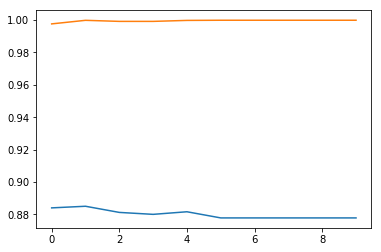

In [43]:
# Log some of the training history, test/validation accuracy.

import matplotlib.pyplot as plt

# Get the history
history = progress.history

# Unpack some values of interest.
loss = history['val_loss']
val_accuracy = history['val_acc']
training_accuracy = history['acc']

# Plot some of our unpacked historical values.
plt.plot(val_accuracy)
plt.plot(training_accuracy)
